In [1]:
import keras
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
#Carga de datos MNIST
minst = keras.datasets.fashion_mnist

#División de prueba y entrenamiento
(x_train, y_train), (x_test, y_test) = minst.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [5]:
#Normalización de los valores de los píxeles del train y prueba
x_train = x_train / 255
x_test = x_test / 255

In [7]:
#Construcción del modelo de clasificación
model = keras.models.Sequential([
    #Adición de convoluciones y max pooling
    keras.layers.Conv2D(32, (3, 3), activation="relu", input_shape=[28, 28, 1]),
    keras.layers.MaxPooling2D((2, 2)),
    #Agregar las mismas capas anteriores
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation="relu"),
    keras.layers.Dense(10, activation="softmax")])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 flatten (Flatten)           (None, 5408)              0         
                                                                 
 dense (Dense)               (None, 128)               692352    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 693962 (2.65 MB)
Trainable params: 693962 (2.65 MB)
Non-trainable params: 0 (0.00 Byte)
____________________

In [8]:
#Compilación del modelo
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [9]:
#Entrenamiento
history = model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 44s 23ms/step - loss: 0.4158 - accuracy: 0.8534
Epoch 2/10
1875/1875 [==============================] - 43s 23ms/step - loss: 0.2791 - accuracy: 0.8987
Epoch 3/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.2308 - accuracy: 0.9164
Epoch 4/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.1976 - accuracy: 0.9280
Epoch 5/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.1722 - accuracy: 0.9357
Epoch 6/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.1469 - accuracy: 0.9464
Epoch 7/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.1271 - accuracy: 0.9533
Epoch 8/10
1875/1875 [==============================] - 42s 22ms/step - loss: 0.1086 - accuracy: 0.9598
Epoch 9/10
1875/1875 [==============================] - 51s 27ms/step - loss: 0.0940 - accuracy: 0.9653
Epoch 10/10
1875/1875 [==============================] - 63s 33m

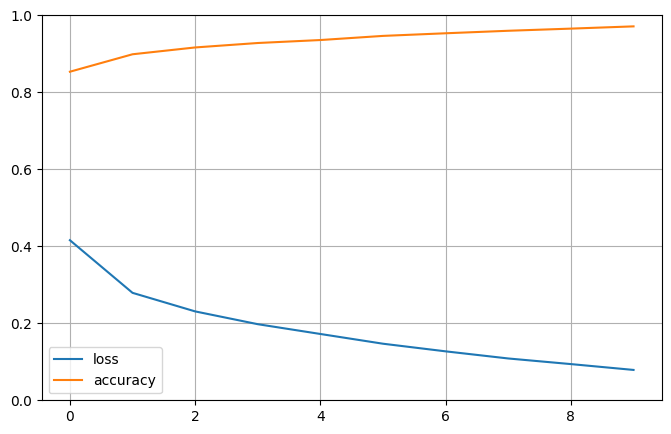

In [10]:
#Gráfico del historial de entrenamiento
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [11]:
#Evalución del modelo en el conjunto de entrenamiento
loss, accuracy = model.evaluate(x_train, y_train)
print("Loss training:", loss)
print("Accuracy training:", accuracy)

#Evaluación con datos no vistos
loss, accuracy = model.evaluate(x_test, y_test)
print("Loss test:", loss)
print("Accuracy test:", accuracy)

1875/1875 [==============================] - 18s 10ms/step - loss: 0.0604 - accuracy: 0.9794
Loss training: 0.06038559600710869
Accuracy training: 0.9793833494186401
313/313 [==============================] - 2s 6ms/step - loss: 0.2865 - accuracy: 0.9169
Loss test: 0.2864893674850464
Accuracy test: 0.9168999791145325


In [12]:
#Predicción
index = 1
print(f'Label: {y_test[index]}')
classification = model.predict(x_test[index:index+1])
print(f'Classification:\n {classification.reshape(-1,1)}')

Label: 2
1/1 [==============================] - 0s 102ms/step
Classification:
 [[2.8835609e-09]
 [4.3032517e-20]
 [1.0000000e+00]
 [1.1722441e-12]
 [5.2589049e-09]
 [1.9869336e-14]
 [8.8179963e-10]
 [3.0030081e-20]
 [5.8887612e-13]
 [5.2971352e-18]]


In [13]:
print(y_test[:30])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3]


In [16]:
FIRST_IMAGE = 3
SECOND_IMAGE = 10
THIRD_IMAGE = 27

print(y_test[FIRST_IMAGE])
print(y_test[SECOND_IMAGE])
print(y_test[THIRD_IMAGE])

1
4
0


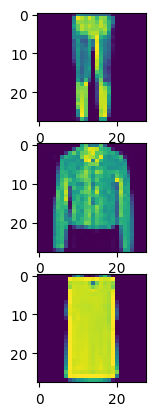

In [17]:
f, axarr = plt.subplots(3, 1)
axarr[0].imshow(x_test[FIRST_IMAGE].reshape(28, 28))
axarr[1].imshow(x_test[SECOND_IMAGE].reshape(28, 28))
axarr[2].imshow(x_test[THIRD_IMAGE].reshape(28, 28))

In [19]:
layer = 0
filter1 = 0
filter2 = 10

layer_outputs = [layer.output for layer in model.layers]
activation_model = keras.models.Model(inputs=model.input, outputs=layer_outputs)

1/1 [==============================] - 0s 22ms/step


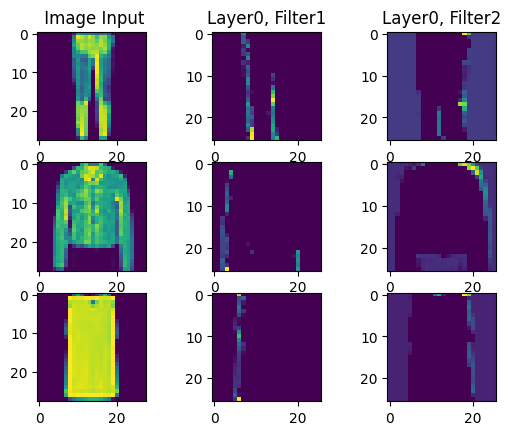

In [20]:
f, axarr = plt.subplots(3, 3)

axarr[0, 0].set_title(" Image Input")
axarr[0, 0].imshow(x_test[FIRST_IMAGE].reshape(28, 28))
f1 = activation_model.predict(x_test[FIRST_IMAGE].reshape(1, 28, 28, 1))[layer]
axarr[0, 1].set_title("Layer" + str(layer) + ", Filter1")
axarr[0, 1].imshow(f1[0, :, :, filter1])
axarr[0, 2].set_title("Layer" + str(layer) + ", Filter2")
axarr[0, 2].imshow(f1[0, :, :, filter2])

axarr[1, 0].imshow(x_test[SECOND_IMAGE].reshape(28, 28))
f2 = activation_model.predict(x_test[SECOND_IMAGE].reshape(1, 28, 28, 1))[layer]
axarr[1, 1].imshow(f2[0, :, :, filter1])
axarr[1, 2].imshow(f2[0, :, :, filter2])

axarr[2, 0].imshow(x_test[THIRD_IMAGE].reshape(28, 28))
f3 = activation_model.predict(x_test[THIRD_IMAGE].reshape(1, 28, 28, 1))[layer]
axarr[2, 1].imshow(f3[0, :, :, filter1])
axarr[2, 2].imshow(f3[0, :, :, filter2])